# Grafici Assorbanze.

Siccome la Fra è simpatica e vuole pure i grafici delle assorbanze e siccome questi grafici sono delle cagate da fare perchè non farli subito

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def absorbance_from_transmittance(x):
    return -np.log10(x)

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family" : "mathptmx",
    "svg.fonttype" : "none",
    }
)


# Immagini 31 Maggio Vetro

Sono quelle già di color ciclo

In [3]:
data_1 = pd.read_csv("./data/31-05_spettrofotometro/ELAB/Oro1_Vetro_1.csv")
data_1.head()

,lambda,transmittance,polished,trasm_error
0,9.000000e-07,0.7665,0.873106,0.004243
1,8.995000e-07,0.8538,1.015099,0.004243
2,8.990000e-07,0.8432,0.956009,0.004243
3,8.985000e-07,0.8561,0.942841,0.004243
4,8.980000e-07,0.8763,0.927596,0.004243


In [4]:
data_1["absorbance"] = absorbance_from_transmittance(data_1["polished"])

data_1.head()

,lambda,transmittance,polished,trasm_error,absorbance
0,9.000000e-07,0.7665,0.873106,0.004243,0.058933
1,8.995000e-07,0.8538,1.015099,0.004243,-0.006509
2,8.990000e-07,0.8432,0.956009,0.004243,0.019538
3,8.985000e-07,0.8561,0.942841,0.004243,0.025561
4,8.980000e-07,0.8763,0.927596,0.004243,0.032641


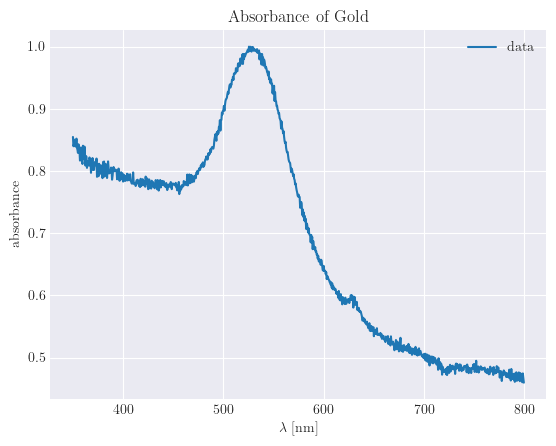

In [18]:
def graph(dat):
    filtered = dat[(dat["lambda"] > 300e-9) & (dat["lambda"] < 800e-9)]
    plt.plot(filtered["lambda"] * 1e9, filtered["absorbance"] / filtered["absorbance"].max(), label = "data")
    plt.title("Absorbance of Gold")
    plt.xlabel(r"$\lambda$ [nm]")
    plt.ylabel("absorbance")
    plt.legend()

graph(data_1)

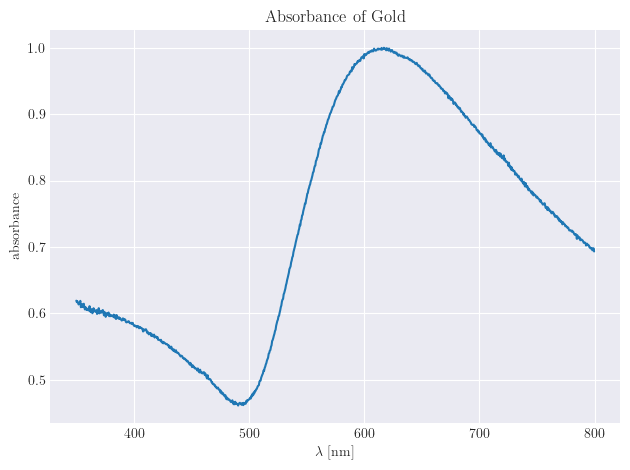

In [6]:
data_3 = pd.read_csv("./data/31-05_spettrofotometro/ELAB/Oro3_Vetro_1.csv")
data_3["absorbance"] = absorbance_from_transmittance(data_3["polished"])
graph(data_3)

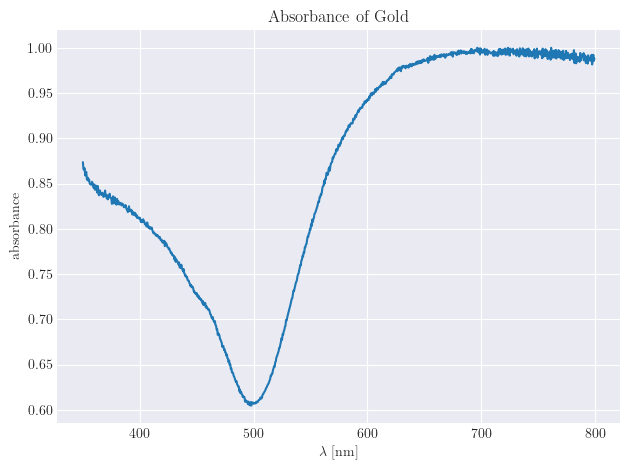

In [7]:
data_4 = pd.read_csv("./data/31-05_spettrofotometro/ELAB/Oro4_Vetro_1.csv")
data_4["absorbance"] = absorbance_from_transmittance(data_4["polished"])
graph(data_4 )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


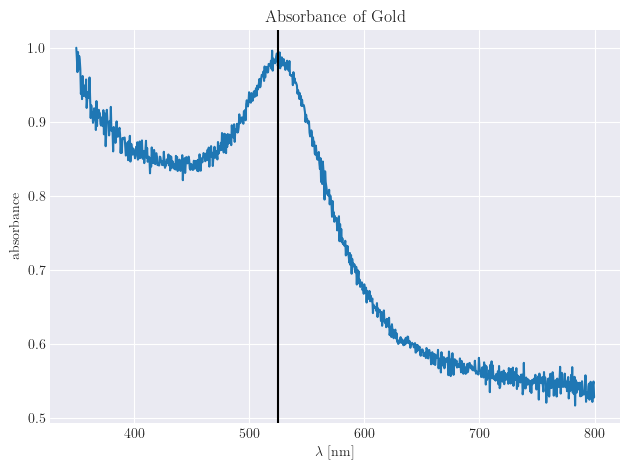

In [8]:
from scipy.signal import savgol_filter

data_8 = pd.read_csv("./data/31-05_spettrofotometro/ELAB/Oro8_Vetro_1.csv")
data_8["absorbance"] = absorbance_from_transmittance(data_8["polished"])
graph(data_8)

pos_post = savgol_filter(
    data_8[(data_8["lambda"] > 400e-9) & (data_8["lambda"] < 800e-9)]["absorbance"],
    51,
    3,
).argmax()

plt.axvline(
    data_8[(data_8["lambda"] > 400e-9) & (data_8["lambda"] < 800e-9)].iloc[pos_post][
        "lambda"
    ]
    * 1e9,
    c="k",
)

plt.savefig(
    "Immagine_Plasmone_Vetro.svg",
    format= "svg"
)

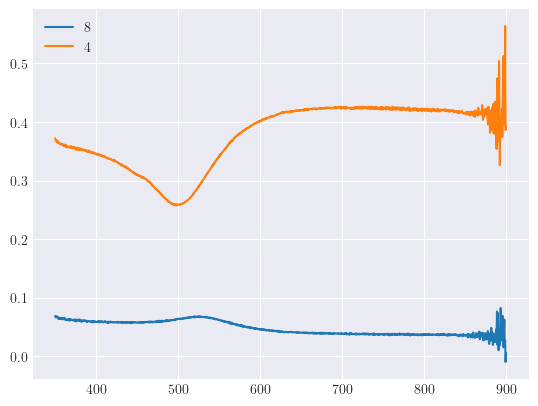

In [9]:
plt.plot(data_8["lambda"] * 1e9, data_8["absorbance"], label = "8" ) # / filtered["absorbance"].max()
plt.plot(data_4["lambda"] * 1e9, data_4["absorbance"], label = "4" ) # / filtered["absorbance"].max()
plt.legend()

In [10]:
wv_gold_post = data_8[(data_8["lambda"]>400e-9) & (data_8["lambda"]<800e-9)].iloc[pos_post]["lambda"] * 1e9
wv_gold_post

525.5

# Immagini 31 Maggio PDMS

Sono quelle nel PDMS, quindi viola

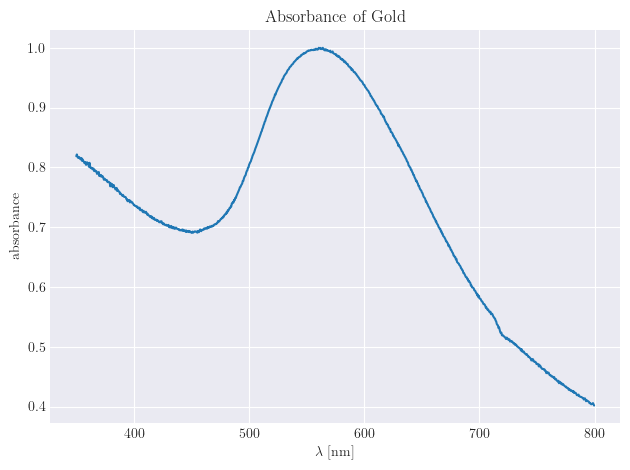

In [11]:
data_1_PDMS = pd.read_csv("./data/31-05_spettrofotometro/ELAB/OroPDMS_1_PDMS_1.csv")
data_1_PDMS["absorbance"] = absorbance_from_transmittance(data_1_PDMS["polished"])
graph(data_1_PDMS)

plt.savefig(
    "Immagine_Plasmone_PDMS.svg",
    format = "svg"
)

In [12]:
pos = np.argmax(data_1_PDMS["absorbance"])
data_1_PDMS.iloc[pos]

lambda           5.605000e-07
transmittance    2.024000e-01
polished         2.084449e-01
trasm_error      4.242641e-03
absorbance       6.810087e-01
Name: 679, dtype: float64

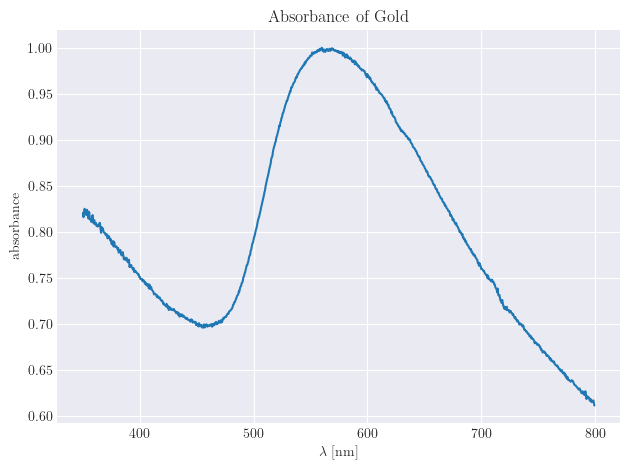

In [13]:
data_2_PDMS = pd.read_csv("./data/31-05_spettrofotometro/ELAB/OroPDMS_2_PDMS_1.csv")
data_2_PDMS["absorbance"] = absorbance_from_transmittance(data_2_PDMS["polished"])
graph(data_2_PDMS)

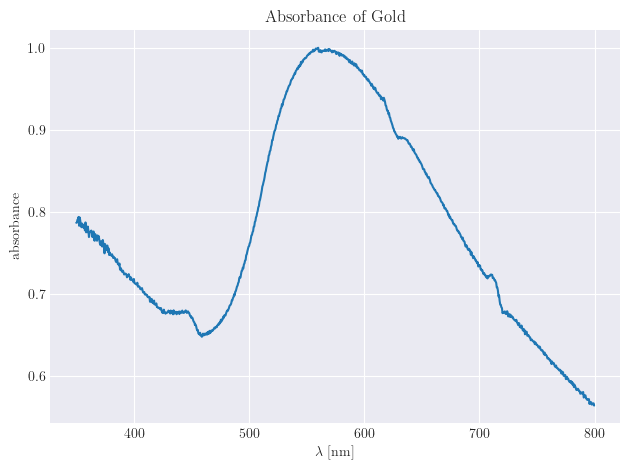

In [14]:
data_3_PDMS = pd.read_csv("./data/31-05_spettrofotometro/ELAB/OroPDMS_2_PDMS_2_1.csv")
data_3_PDMS["absorbance"] = absorbance_from_transmittance(data_3_PDMS["polished"])
graph(data_3_PDMS)

# Immagini 30 Maggio Vetro

sono quelle azzurro Mare Inquinato

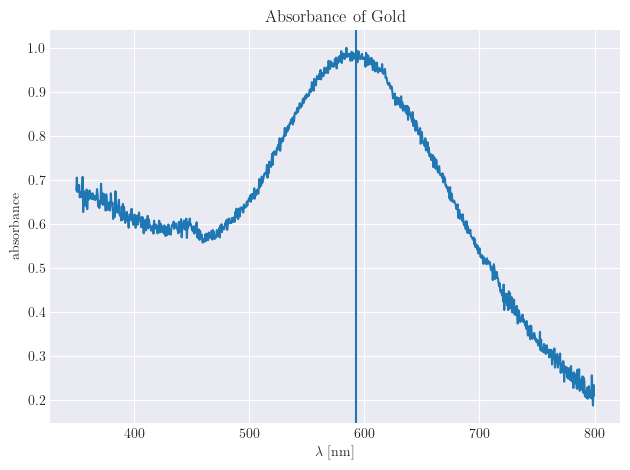

In [15]:
data_8_PRE = pd.read_csv("./data/30-05_spettrofotometro/ELAB/Oro8_Vetro_1.csv")
data_8_PRE["absorbance"] = absorbance_from_transmittance(data_8_PRE["polished"])
graph(data_8_PRE)
pos_PRE = savgol_filter(data_8_PRE["absorbance"],  120, 3).argmax()

plt.axvline(data_8_PRE.iloc[pos_PRE]["lambda"] * 1e9)

pos_PRE = data_8_PRE["absorbance"].argmax()
wv_gold_pre = data_8_PRE.iloc[pos_PRE]["lambda"] * 1e9 # nm

# Immagine figa da mettere in relazione

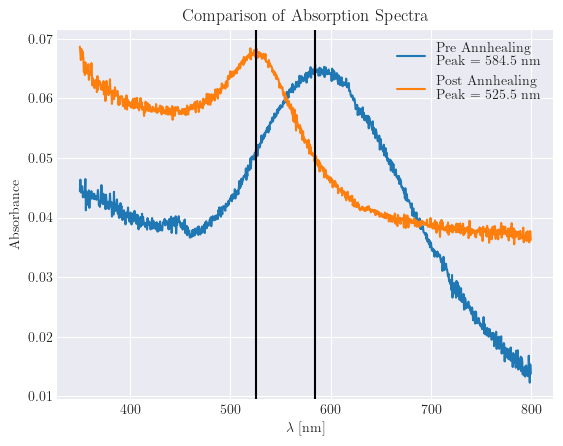

In [16]:
from scipy.signal import savgol_filter

data_8_PRE_filter = data_8_PRE[(data_8_PRE["lambda"]>300e-9) &  (data_8_PRE["lambda"]<800e-9)]
data_8_filter = data_8[(data_8["lambda"]>300e-9) &  (data_8["lambda"]<800e-9)]

plt.plot(data_8_PRE_filter["lambda"] * 1e9, data_8_PRE_filter["absorbance"], label= f"Pre Annhealing\nPeak = {wv_gold_pre:.1f} nm")
plt.plot(data_8_filter["lambda"] * 1e9, data_8_filter["absorbance"], label= f"Post Annhealing\nPeak = {wv_gold_post:.1f} nm")
plt.title("Comparison of Absorption Spectra")
plt.xlabel("$\\lambda $ [nm]")
plt.ylabel("Absorbance")
plt.axvline(wv_gold_post, color= 'k' )
plt.axvline(wv_gold_pre, color = 'k')
plt.legend()
plt.savefig(
    "Confronto_Annhealing.svg",
    format = "svg"
)